In [1]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)


Step 3: Collecting Data:

In [2]:
#loading the dataset to a pandas dataframe
data=pd.read_csv(r'/content/mcdonalds.csv')

Step 4: Exploring the data

In [3]:
##colums names
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
##top 5 rows
data.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
##the shape of dataset
data.shape

(1453, 15)

In [6]:
#data type
data.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [7]:
#the unique values of variable
data.nunique()

yummy              2
convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age               54
VisitFrequency     6
Gender             2
dtype: int64

In [8]:
# Extracting insights from the data across all datasets.
data.describe(include='all')


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [9]:
#count of missing values
data.isna().sum()
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

Transforming a categorical column into numerical representation

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def labelling(col):
 data[col] = le.fit_transform(data[col])
category = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

for i in category:
 labelling(i)
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [11]:
#check details
data1= data.iloc[:,0:11]
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
dtypes: int64(11)
memory usage: 125.0 KB


In [12]:
#top 5 rows
data1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [13]:
scaled_df = scalar.fit_transform(data1)
pca = PCA(n_components=11)
principal_components = pca.fit_transform(scaled_df)
pca_df =pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3",
"PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
pca_df.head()


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


<ipython-input-14-fed02f4a5bd6>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



<Axes: xlabel='PCA1', ylabel='PCA2'>

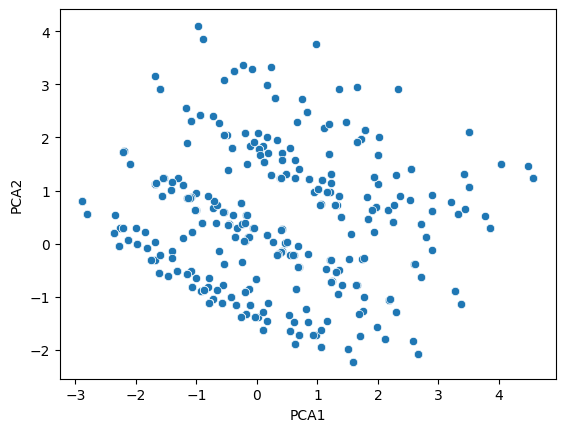

In [14]:
#Visualization of pca
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", palette="deep")

<Axes: >

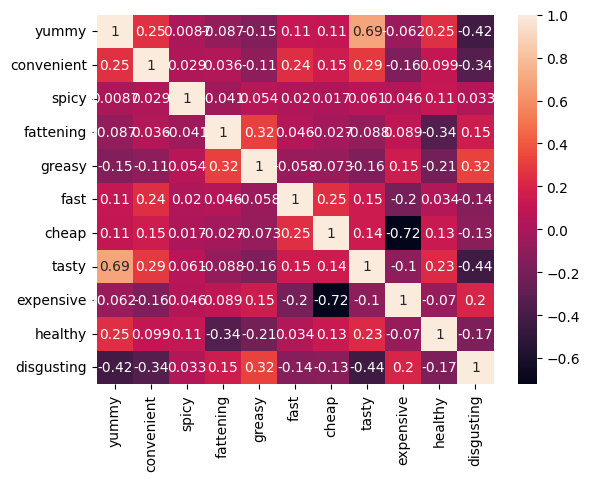

In [15]:
sns.heatmap(data1.corr(), annot=True)

Step5 :Extracting segments

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

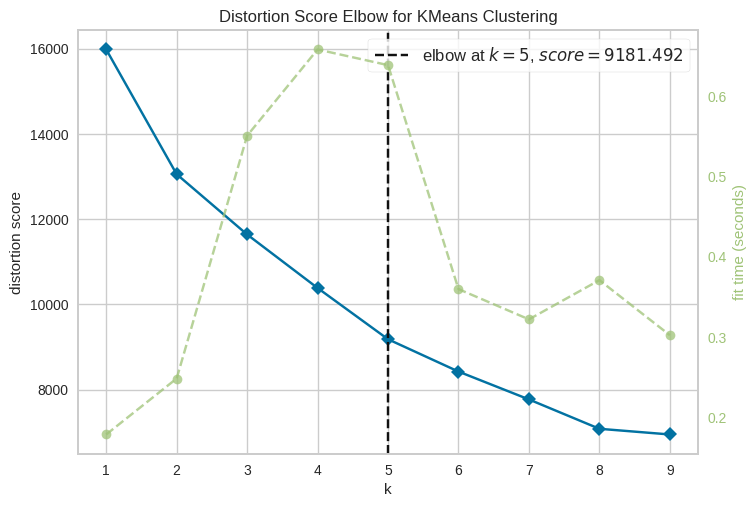

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
#import libaries from sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# Instantiate the clustering model and visualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaled_df)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



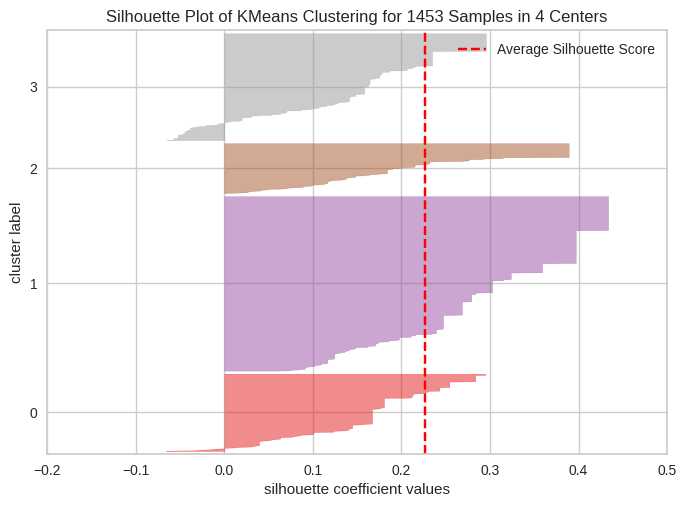

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1453 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
# Instantiate the clustering model and visualizer
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(scaled_df)
visualizer.show()

In [18]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans=pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,cluster
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170,1
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681,3
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530,3
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201,0
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144,1


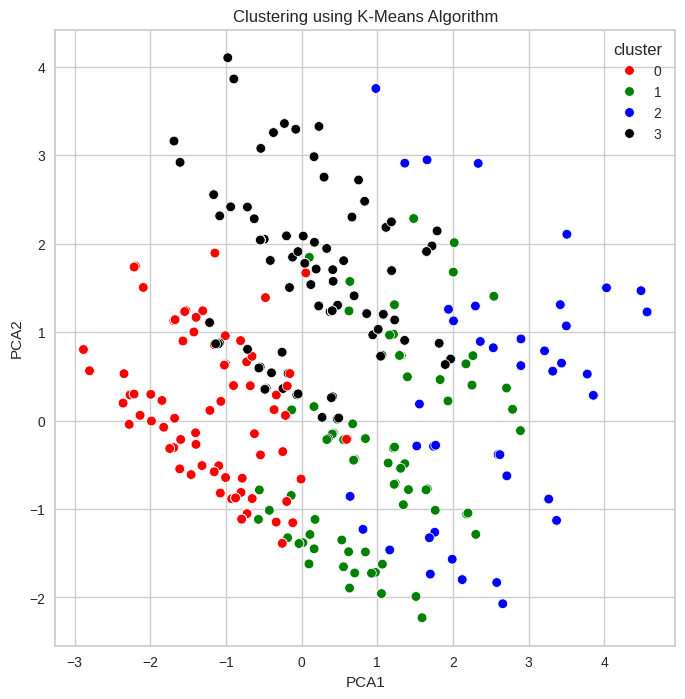

In [19]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,
palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()


In [20]:
#assign cluster number with there type in PCA
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans1=pd.concat([data1,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans1.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,1
1,1,1,0,1,1,1,1,1,1,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,3
3,1,1,0,1,1,1,1,1,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,0


Step 5 Profiling the segments

<Axes: xlabel='cluster', ylabel='count'>

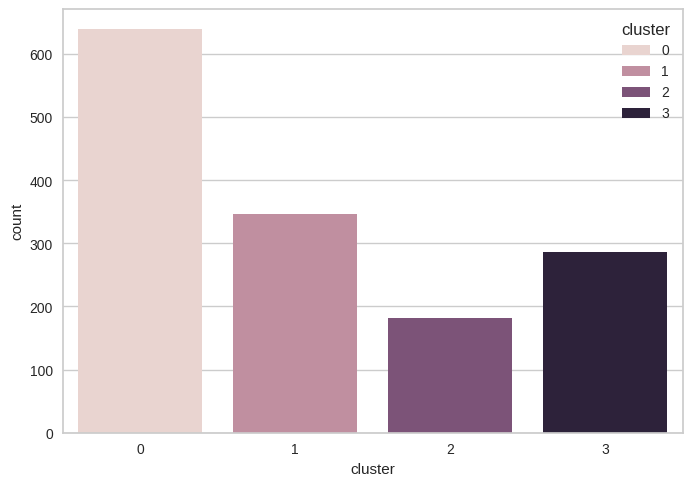

In [21]:
#Cluster Analysis
sns.countplot(x ='cluster', data = pca_df_kmeans1,hue = "cluster")

In [22]:
cluster_1_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==0]
cluster_1_df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
3,1,1,0,1,1,1,1,1,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,0
5,1,1,0,1,0,1,1,1,0,0,0,0
7,1,1,0,1,1,1,1,1,0,0,0,0
12,0,1,0,1,0,1,1,0,0,0,0,0


<ipython-input-23-30d349443330>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




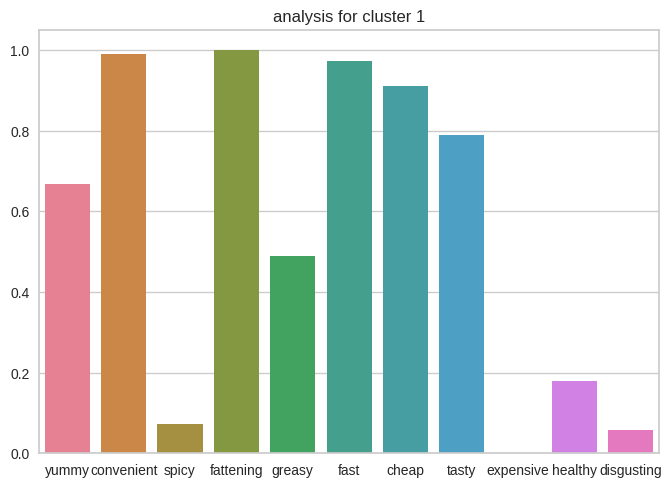

In [23]:
ax = sns.barplot(data=cluster_1_df[['yummy', 'convenient', 'spicy',
'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive',
'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 1')
plt.show()

In [24]:
cluster_2_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==1]
cluster_2_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,1
8,0,0,0,1,1,0,0,0,1,0,1,1
10,0,1,0,1,0,1,1,0,0,0,1,1
14,0,1,0,1,0,1,0,0,1,0,0,1
18,0,0,0,1,1,1,1,0,1,0,1,1


<ipython-input-25-05f79641b8b1>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




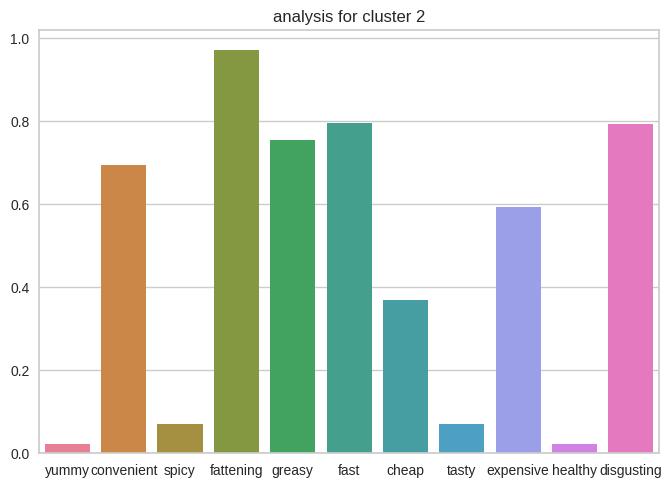

In [25]:
ax = sns.barplot(data=cluster_2_df[['yummy', 'convenient', 'spicy',
'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive',
'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 2')
plt.show()


In [26]:
cluster_3_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==2]
cluster_3_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
17,1,1,0,0,1,1,0,1,0,0,0,2
28,0,1,0,0,0,1,0,0,0,0,0,2
31,0,1,0,0,0,1,1,1,0,1,0,2
46,0,1,0,0,0,1,0,1,0,1,0,2
54,1,1,0,0,0,1,1,1,0,1,0,2


<ipython-input-27-eb655d50334d>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




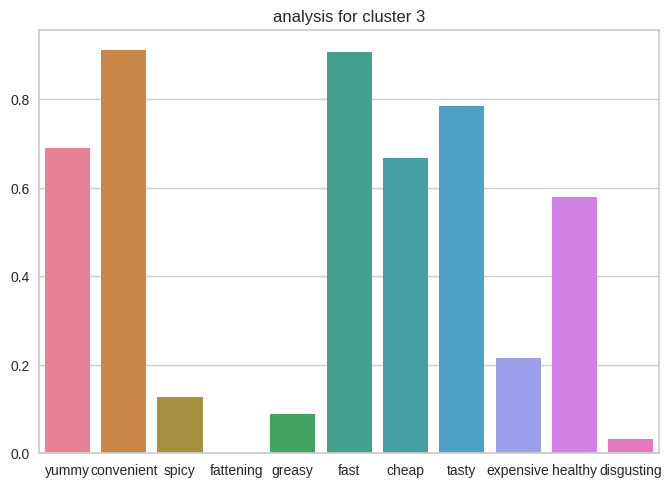

In [27]:
ax = sns.barplot(data=cluster_3_df[['yummy', 'convenient', 'spicy',
'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive',
'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 3')
plt.show()


In [28]:
cluster_4_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==3]
cluster_4_df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
1,1,1,0,1,1,1,1,1,1,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,3
6,1,1,1,1,0,1,0,1,1,1,0,3
9,1,1,0,1,1,1,0,1,1,0,0,3
11,1,1,0,1,1,1,0,1,1,0,1,3


<ipython-input-29-b298f98d0d22>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




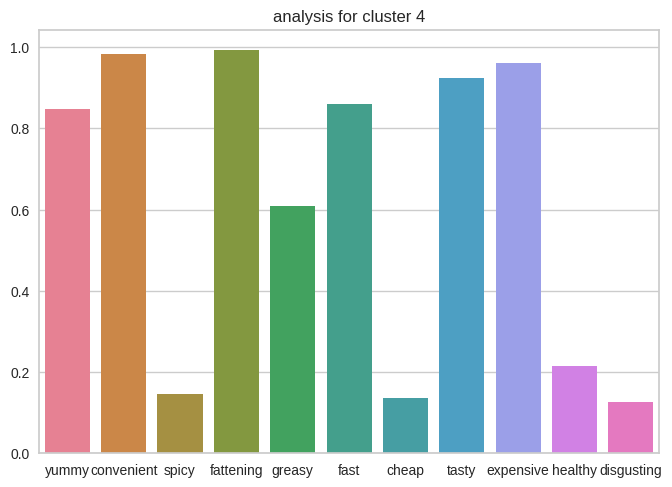

In [29]:
ax = sns.barplot(data=cluster_4_df[['yummy', 'convenient', 'spicy',
'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive',
'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 4')
plt.show()

Step:7 Describining Segments

In [30]:
data_new=pd.concat([data,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1
)
data_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,3
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,3
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,0


In [31]:
data_new['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [32]:
data_new["VisitFrequency"]= data_new["VisitFrequency"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'More than once a week':5})
data_new['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [33]:
data_new['Gender'].value_counts()


Female    788
Male      665
Name: Gender, dtype: int64

In [34]:
data_new["Like"]= data_new["Like"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})
data_new["Gender"]= data_new["Gender"].replace({'Female':0, 'Male':1})
data_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,2,0,1
1,1,1,0,1,1,1,1,1,1,0,0,7,51,2,0,3
2,0,1,1,1,1,1,0,1,1,1,0,6,62,2,0,3
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,0,0
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,0


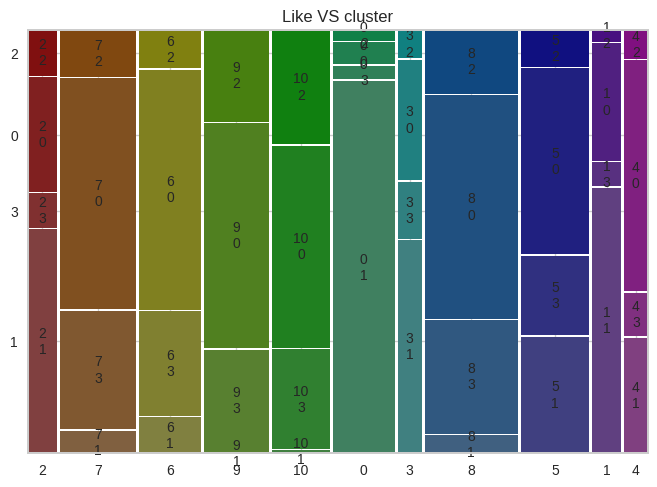

In [35]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data_new, ['Like','cluster'],title='Like VS cluster')
plt.show()

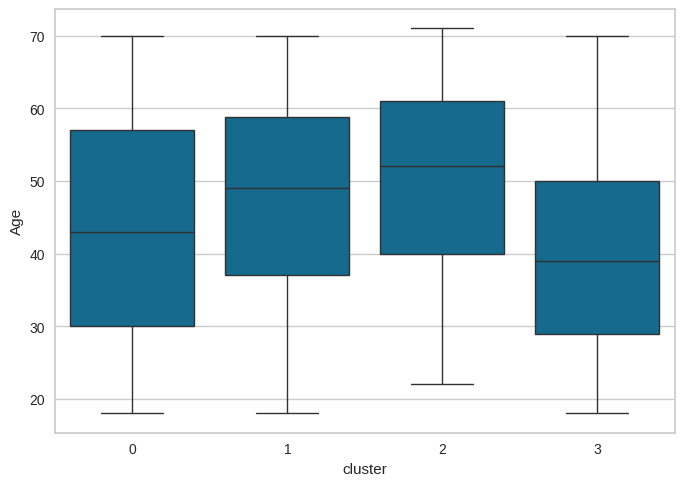

In [36]:
sns.boxplot(x=data_new['cluster'], y=data_new['Age'])
plt.show()

Step 8: Selecting Target Segments

In [37]:
X = data_new.drop(['cluster'],axis=1)
y= data_new[['cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y,
test_size=0.3)
X_test.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
875,0,1,0,1,0,0,0,1,1,0,0,7,57,2,1
1136,0,1,1,1,0,1,0,0,1,0,1,0,62,0,0
227,1,1,0,1,0,1,1,1,0,0,0,8,27,3,0
1411,1,1,0,1,1,1,1,1,0,0,0,7,55,1,0
670,0,1,0,1,1,1,1,0,0,0,1,0,26,1,0


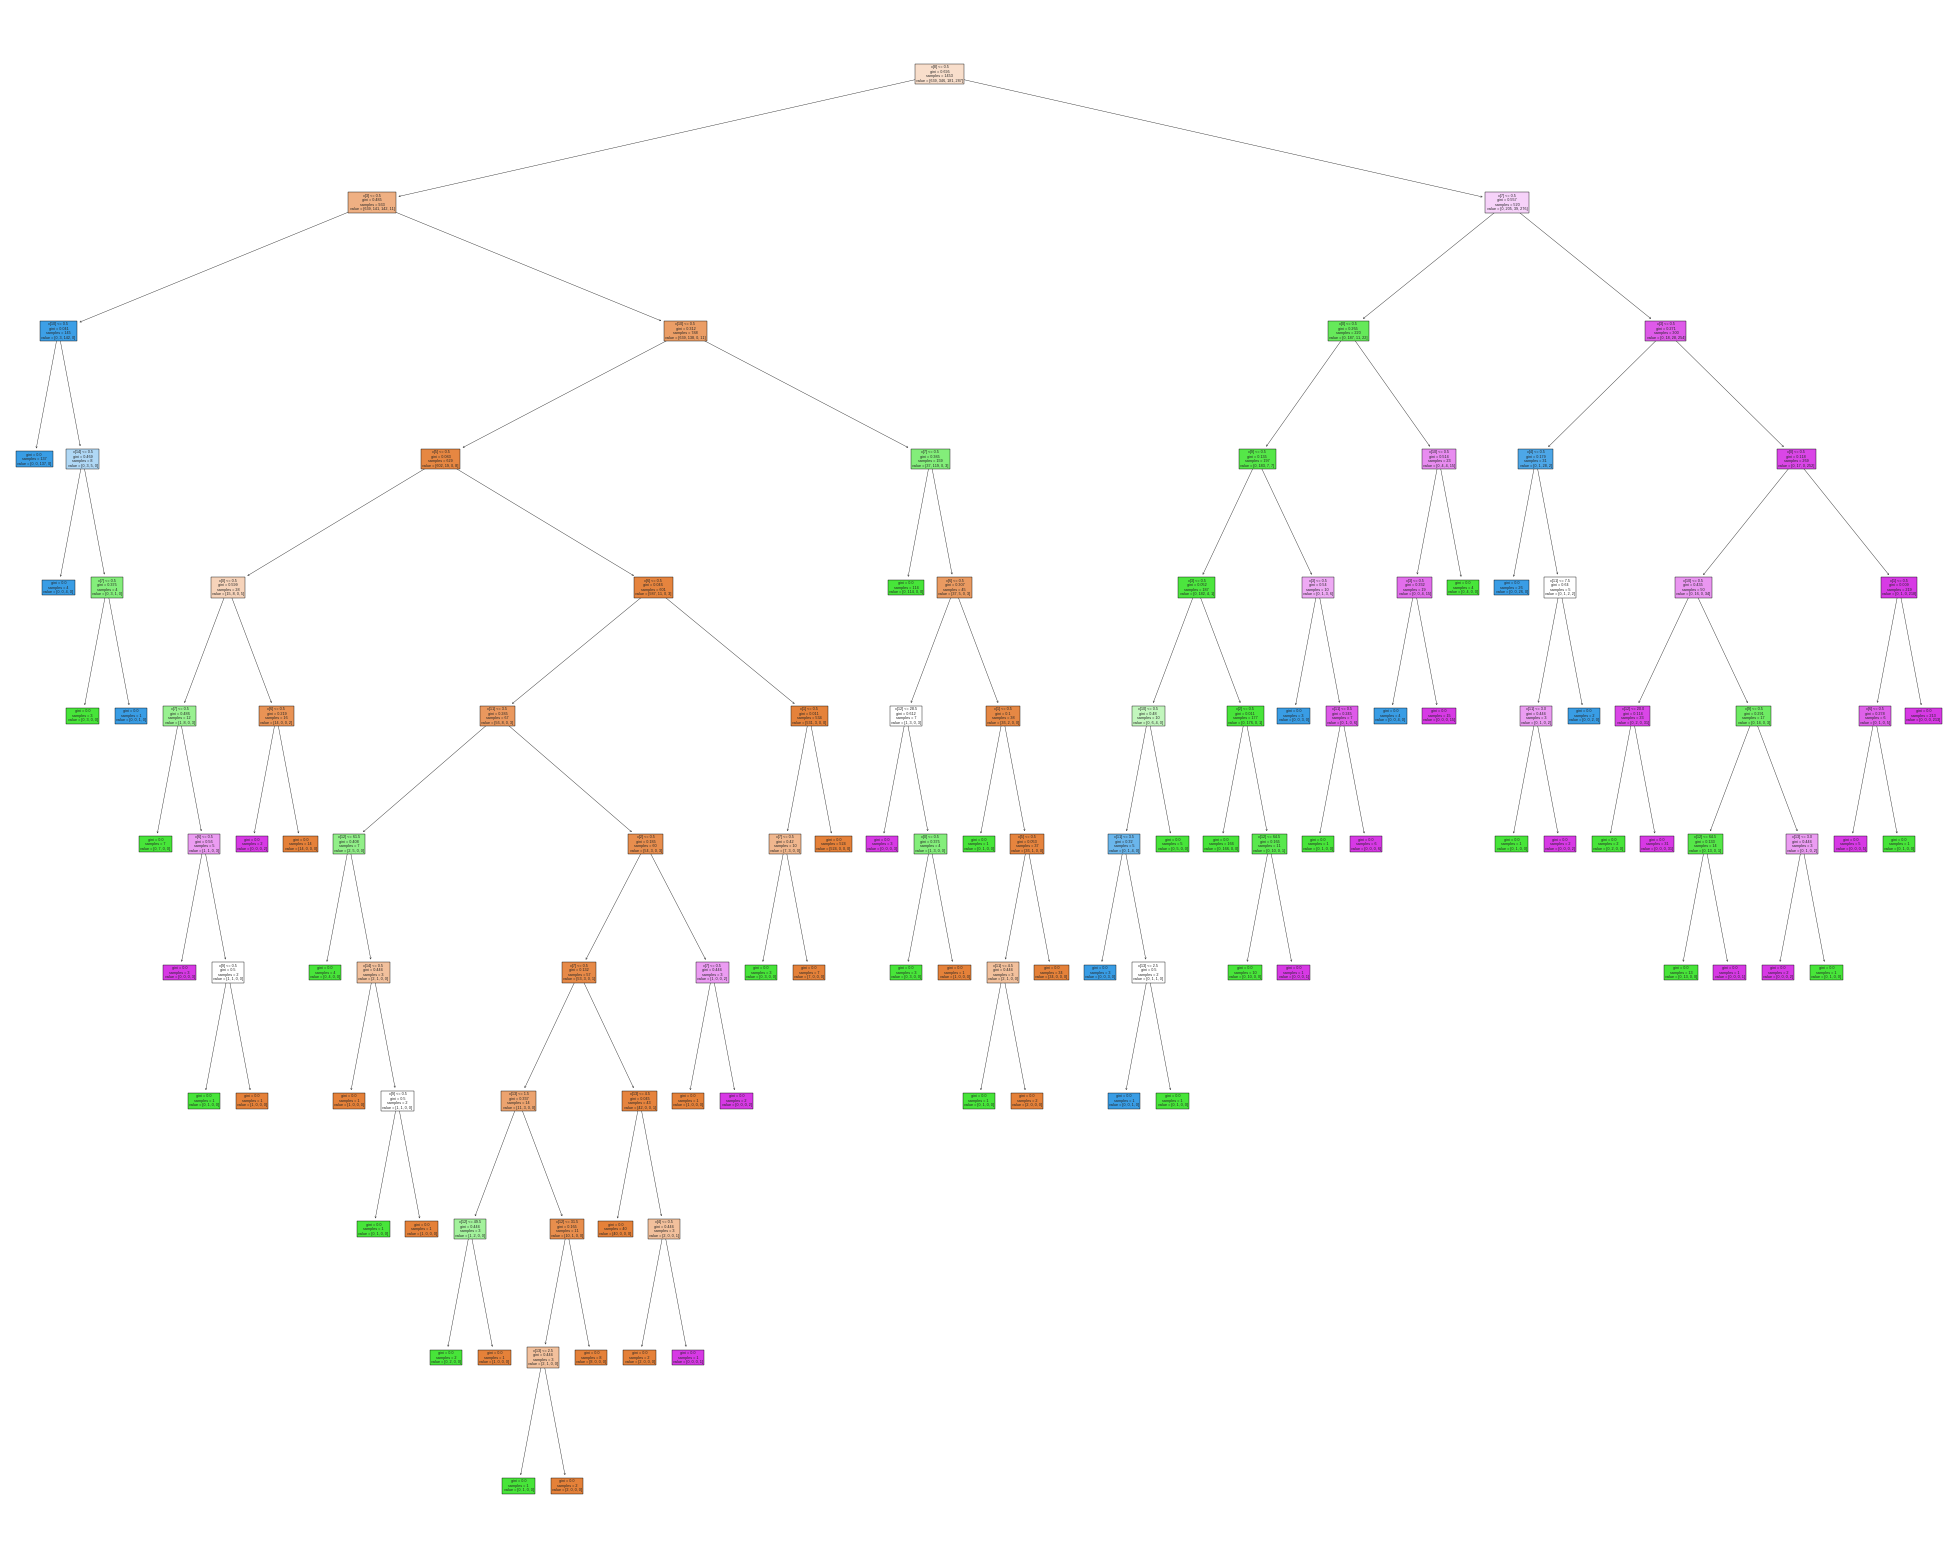

In [38]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled=True)

In [39]:
fig = px.funnel(x=data_new['VisitFrequency'], y=data_new['Like'],
color=data_new['Like'], title='VisitFrequency vs Like', labels={ 'x':
'VisitFrequency', 'y': 'Like' })
fig.show()

In [40]:
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[192   3   0   0]
 [  2  95   1   1]
 [  0   1  57   2]
 [  0   5   1  76]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       195
           1       0.91      0.96      0.94        99
           2       0.97      0.95      0.96        60
           3       0.96      0.93      0.94        82

    accuracy                           0.96       436
   macro avg       0.96      0.96      0.96       436
weighted avg       0.96      0.96      0.96       436



In [41]:
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')


0.963302752293578 % Acuuracy
